#### import the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf


In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### explore the data to find missing values

In [4]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [5]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

### 1.Fill missing data and replace the ? with mode value
### 2.Clean the data

In [8]:
df.duplicated().sum()

29

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['occupation'] = df['occupation'].fillna(value=df['occupation'].mode()[0])
df['occupation'] = df['occupation'].replace('?', df['occupation'].mode()[0])

In [11]:
df['native-country'] = df['native-country'].fillna(value=df['native-country'].mode()[0])
df['native-country'] = df['native-country'].replace('?', df['native-country'].mode()[0])

In [12]:
df['workclass'] = df['workclass'].fillna(value=df['workclass'].mode()[0])
df['workclass'] = df['workclass'].replace('?', df['workclass'].mode()[0])

In [13]:
# binary encode sex feature
df['sex'] = df['sex'] == 'Male'
df['sex'] = df['sex'].astype(int)

## Encode the Categorical features


In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [15]:
# One-hot encoding multiple features
df_encoded = pd.get_dummies(df, columns=['education', 'marital-status', 'occupation', 'native-country', 'workclass', 'race', 'relationship'])
df_encoded = df_encoded.astype(int, errors='ignore')
df_encoded.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,education_10th,education_11th,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,77516,13,1,2174,0,40,<=50K,0,0,...,0,0,0,1,0,1,0,0,0,0
1,50,83311,13,1,0,0,13,<=50K,0,0,...,0,0,0,1,1,0,0,0,0,0
2,38,215646,9,1,0,0,40,<=50K,0,0,...,0,0,0,1,0,1,0,0,0,0
3,53,234721,7,1,0,0,40,<=50K,0,1,...,0,1,0,0,1,0,0,0,0,0
4,28,338409,13,0,0,0,40,<=50K,0,0,...,0,1,0,0,0,0,0,0,0,1


In [16]:
df_encoded['income'].value_counts()

income
<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: count, dtype: int64

In [17]:
# Handling the Inconsistent data 
df_encoded['income'] = df_encoded['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df_encoded['income'].value_counts()

income
<=50K    37128
>50K     11685
Name: count, dtype: int64

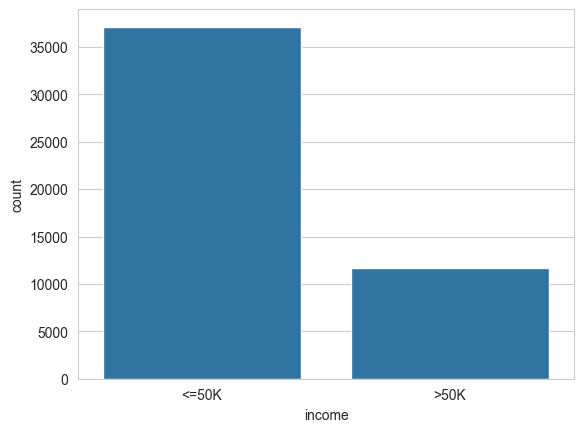

In [18]:
sns.countplot(x = 'income', data = df_encoded);

## The data is imbalanced, so we need to handle this problem by oversampling 
over sample the training data to avoid overfitting

In [19]:
df_encoded.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,...,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,0.668490,1079.708705,87.554299,40.425051,0.028456,0.037121,0.013439,...,0.031098,0.095938,0.008317,0.855018,0.403765,0.257452,0.030852,0.155205,0.104972,0.047754
std,13.709005,1.056062e+05,2.570257,0.470761,7454.185982,403.118605,12.390954,0.166272,0.189061,0.115146,...,0.173585,0.294509,0.090821,0.352086,0.490657,0.437235,0.172920,0.362103,0.306521,0.213247
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.781400e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.376200e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
x = df_encoded.drop('income', axis = 1)
y = df_encoded['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)
print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 48813
Training data size: 39050
Testing data size: 9763


In [21]:
scaler = MinMaxScaler()
x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)

In [22]:
# make y_train one dimensional array
y_train = y_train.to_numpy().ravel()

In [36]:
# # Check the original class distribution
# print("Original class distribution:")
# print(pd.Series(y_train).value_counts())
# 
# # Apply SMOTE to balance the dataset(over sample)
# smote = SMOTE(random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x_train_transformed, y_train)
# 
# # Check the new class distribution
# print("\nResampled class distribution:")
# print(pd.Series(y_resampled).value_counts())

## Random Forest

In [24]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(x_train_transformed, y_train)
# Predict
y_pred = rf_model.predict(x_test_transformed)

In [25]:
# Classification report
print('Classification Report (RANDOM FOREST):')

acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_pred)
print(report)


Classification Report (RANDOM FOREST):
Model accuracy was 85.59%
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7502
        >50K       0.73      0.61      0.66      2261

    accuracy                           0.86      9763
   macro avg       0.81      0.77      0.78      9763
weighted avg       0.85      0.86      0.85      9763



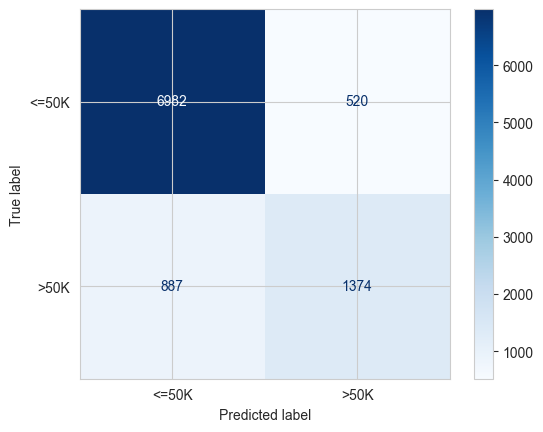

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()

##  KNN

In [27]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Train the model
knn.fit(x_train_transformed, y_train)
# Predict 
y_hat_knn = knn.predict(x_test_transformed)

In [28]:
# Classification report
print('Classification Report (KNN):')

acc = accuracy_score(y_test, y_hat_knn)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_knn)
print(report)

Classification Report (KNN):
Model accuracy was 82.56%
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7502
        >50K       0.64      0.56      0.60      2261

    accuracy                           0.83      9763
   macro avg       0.76      0.73      0.74      9763
weighted avg       0.82      0.83      0.82      9763



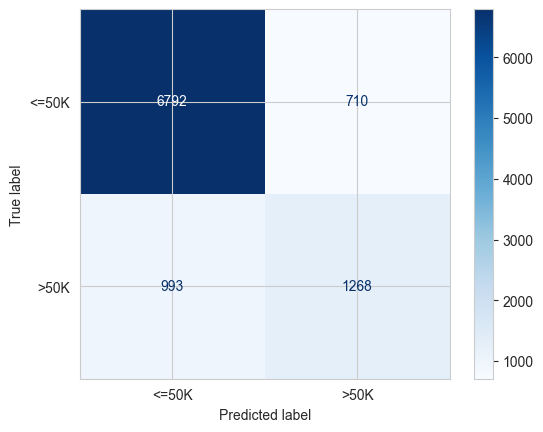

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_knn, cmap=plt.cm.Blues)
plt.show()

## Logistic Regression

In [30]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(multi_class='multinomial')
# Train the model
lr.fit(x_train_transformed, y_train)
# Predict
y_hat_lr = lr.predict(x_test_transformed)

C:\Users\sondo\anaconda3\envs\dstrackenv\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
# Classification report
print('Classification Report (LOGISTIC REGRESSION):')

acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr)
print(report)

Classification Report (LOGISTIC REGRESSION):
Model accuracy was 85.28%
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7502
        >50K       0.72      0.59      0.65      2261

    accuracy                           0.85      9763
   macro avg       0.80      0.76      0.78      9763
weighted avg       0.85      0.85      0.85      9763



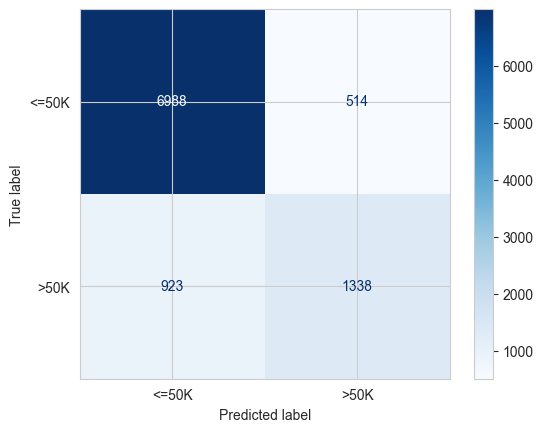

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_lr, cmap=plt.cm.Blues)
plt.show()

## Decision Tree

In [33]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
# Train the model
dt.fit(x_train_transformed, y_train)
# Predict
y_hat_dt = dt.predict(x_test_transformed)

In [34]:
# Classification report
print('Classification Report (Decision Tree):')

acc = accuracy_score(y_test, y_hat_dt)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_dt)
print(report)

Classification Report (Decision Tree):
Model accuracy was 84.82%
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7502
        >50K       0.75      0.52      0.61      2261

    accuracy                           0.85      9763
   macro avg       0.81      0.73      0.76      9763
weighted avg       0.84      0.85      0.84      9763



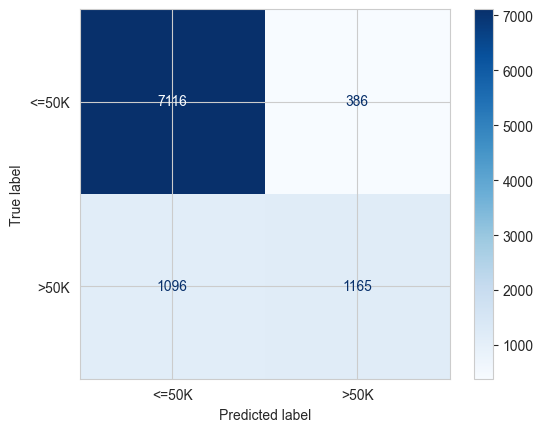

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_dt, cmap=plt.cm.Blues)
plt.show()

## DEEP learning